In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -R /content/drive/MyDrive/Colab\ Notebooks/EssenceMediacom/Outdoor_Case_Study_Data.xlsx ./

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1><center>Data Analytics on the Outdoor Project</center></h1>

>[1 Introduction](#scrollTo=kjteaONYojZZ)

>[2 Problem analysis](#scrollTo=CJorA4mAooAk)

>>[2.1 Purpose and stakeholders analysis](#scrollTo=3ZDi_UFnJcRN)

>>[2.2 Designed data analytics lifecycle](#scrollTo=ughPM-HEKgio)

>>[2.3 Initial hypotheses](#scrollTo=rmdjfi6CNBbf)

>[3 Data preparation (ETL)](#scrollTo=RcBghublornT)

>>[3.1 Import libraries](#scrollTo=Pjf0mLtDo8MI)

>>[3.2 Load the dataset](#scrollTo=0jGur4BupbFE)

>>[3.3 Data pre-processing](#scrollTo=8Q0cTc9MtMzf)

>>>[3.3.1 Check duplicates in the dataset](#scrollTo=Q_Rej-FgtlIA)

>>>[3.3.2 Check missing values in the dataset](#scrollTo=GX1rzsGAvagk)

>>>[3.3.3 Check outliers in the dataset](#scrollTo=XgGVOttFIAlF)

>>>[3.3.4 Explore the correlation of different variables](#scrollTo=6JDav1RzzM5m)

>[4 Data analysis](#scrollTo=EJ_oL7PDT4cr)

>[5 Discussion](#scrollTo=jOO6LpgzvWqW)



# 1 Introduction

In this project, I used a structured approach based on the Big Data Analytics Lifecycle to analyze the provided datasets. Initial data exploration was undertaken to pinpoint crucial attributes, followed by the execution of ETL processes for data cleansing. Once the data was cleaned, I conducted an analysis to extract valuable insights about customer behaviors during weekdays/weekends, customer segmentation, and a competitor comparison based on market share. These insights can assist Outdoor in formulating strategic decisions to bolster sales growth.

#2 Problem analysis

## 2.1 Purpose and stakeholders analysis

*   Purpose: Execute ETL processes for data cleansing, then analyze the data to derive crucial insights using a storytelling approach, with the objective of boosting sales at Outdoor.

*   Stakeholders: Outdoor, competitive brands and customers



## 2.2 Designed data analytics lifecycle

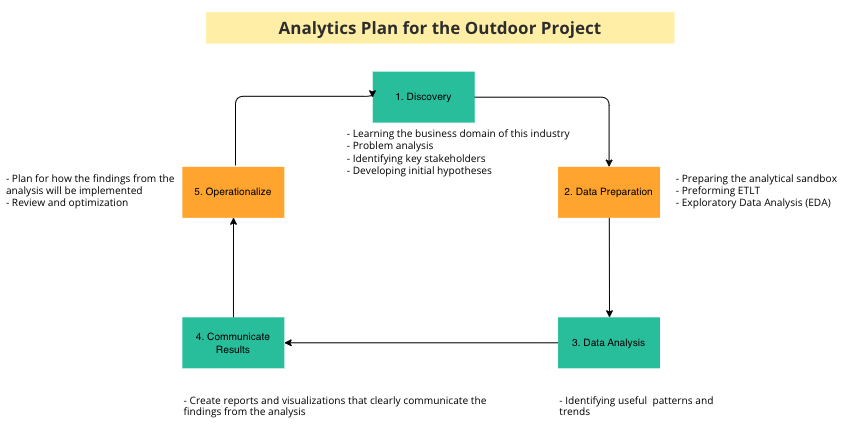

## 2.3 Initial hypotheses

The initial hypotheses will direct the following data analysis:

*   Customer buying behaviors can vary between weekdays and weekends, with some customers potentially demonstrating different shopping habits.
*   Various customer segmentations have differing impacts on sales outcomes.
*   Competitive brands hare different market shares in different regions

#3 Data preparation (ETL)

## 3.1 Import libraries
Before I preprocessed and analyzed the data, I imported the necessary libraries.

In [ ]:
import numpy as np

import os
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

## 3.2 Load the dataset

After reading and examining the datasets, I have an initial understanding of the dataset's size and structure. I consolidated the three datasets. There are 22978 transactional records and 11 attributes in total. Additionally, I have gained a comprehensive understanding of each attribute, allowing for further analysis and interpretation. Understanding the attributes is vital as it enables me to extract meaningful insights and perform data-driven tasks using this dataset. By leveraging this knowledge, I can proceed with data exploration, preprocessing, or any other required analysis tasks with a solid foundation.

In [ ]:
# Read the dataset
xl = pd.ExcelFile('Outdoor_Case_Study_Data.xlsx')

# Load sheets into DataFrame by names
customers = xl.parse('Customers')
transactions = xl.parse('Transactions')
stores = xl.parse('Stores')

In [ ]:
# Join the data
data = pd.merge(transactions, customers, on='CustomerID')
data = pd.merge(data, stores, on='StoreID')

data.head(10)

,TransactionID,CustomerID,Year,Amount,StoreID,Weekday / Weekend,Region_x,Age Band,Gender,Brand,Region_y
0,10001,10463,2012,48.45,10003,Weekend,1,20-30,male,River Deep Camping,1
1,10002,11869,2012,47.55,10003,Weekday,1,20-30,male,River Deep Camping,1
2,10003,11869,2012,53.45,10003,Weekday,1,20-30,male,River Deep Camping,1
3,10005,11869,2012,51.65,10003,Weekday,1,20-30,male,River Deep Camping,1
4,10006,10472,2012,69.35,10003,Weekday,1,20-30,male,River Deep Camping,1
5,10007,10472,2012,57.80,10003,Weekend,1,20-30,male,River Deep Camping,1
6,10008,11491,2012,65.65,10003,Weekday,1,20-30,male,River Deep Camping,1
7,12012,11561,2013,13.50,10003,Weekday,1,20-30,male,River Deep Camping,1
8,12014,10926,2013,46.10,10003,Weekday,1,20-30,male,River Deep Camping,1
9,12015,10926,2013,49.80,10003,Weekday,1,20-30,male,River Deep Camping,1


In [ ]:
# To rename the "Region_x" and "Region_y"  columns:
data = data.rename(columns={'Region_x': 'Region_customer'})
data = data.rename(columns={'Region_y': 'Region_store'})


Upon examining the correlation between "Region_customer" and "Region_store," it's evident that certain customers are shopping in regions different from their place of residence(6853 records).

In [ ]:
# Explore the relationship of "Region_customer" and "Region_store"
selected_data = data[data['Region_customer'] != data['Region_store']]
selected_data

,TransactionID,CustomerID,Year,Amount,StoreID,Weekday / Weekend,Region_customer,Age Band,Gender,Brand,Region_store
533,12361,11476,2013,47.25,10003,Weekday,2,20-30,male,River Deep Camping,1
534,12366,11419,2013,45.65,10003,Weekday,2,20-30,male,River Deep Camping,1
535,12372,11667,2013,33.05,10003,Weekend,2,20-30,male,River Deep Camping,1
536,12381,10427,2013,9.85,10003,Weekday,2,20-30,female,River Deep Camping,1
537,10426,10906,2012,4.95,10003,Weekday,2,20-30,female,River Deep Camping,1
...,...,...,...,...,...,...,...,...,...,...,...
22548,13565,11111,2013,5.60,40003,Weekday,3,50-60,female,River Deep Camping,4
22549,11675,11179,2012,6.60,40003,Weekend,3,50-60,female,River Deep Camping,4
22550,11678,11343,2012,1.75,40003,Weekday,3,50-60,female,River Deep Camping,4
22827,11901,10078,2012,12.65,40003,Weekday,0,40-50,female,River Deep Camping,4


In [ ]:
data.shape

(22978, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22978 entries, 0 to 22977
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionID      22978 non-null  int64  
 1   CustomerID         22978 non-null  int64  
 2   Year               22978 non-null  int64  
 3   Amount             22978 non-null  float64
 4   StoreID            22978 non-null  int64  
 5   Weekday / Weekend  22978 non-null  object 
 6   Region_customer    22978 non-null  int64  
 7   Age Band           22978 non-null  object 
 8   Gender             22978 non-null  object 
 9   Brand              22978 non-null  object 
 10  Region_store       22978 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 2.1+ MB


## 3.3 Data pre-processing

During the ETL (Extract, Transform, Load) process, I gave significant consideration to several important data aspects, including duplicates, missing values and outliers. Overall, the provided dataset is clean. Furthermore, I leveraged data visualization techniques to gain insights into relationships between variables.

By prioritizing these essential steps in the ETL process, including handling duplicates, missing values and outliers, I ensured the dataset's quality, prepared it for the subsequent data analysis, and improved the overall accuracy and reliability of the data analytics task.

### 3.3.1 Check duplicates in the dataset

I conducted a check for duplicates in the dataset and found that no duplicates are present. This result indicates that each record in the dataset is unique, without any exact replicas. The absence of duplicates is beneficial as it ensures the integrity of the data and prevents any redundancy or potential issues that could arise from duplicate entries. With this confirmation, we can proceed with confidence in the data quality and reliability, focusing on further analysis tasks without the need for duplicate handling.

In [ ]:
# check duplicates in the dataset. No duplicates are found.
data.duplicated().sum()

0

### 3.3.2 Check missing values in the dataset

I thoroughly checked for missing values, identifying any instances where data was not available. Handling missing values is crucial for accurate analysis. No missing value is found.

In [ ]:
# Check missing values in the dataset. No missing value is found
print('The sum of NaN data in each column:\n',data.isna().sum())

The sum of NaN data in each column:
 TransactionID        0
CustomerID           0
Year                 0
Amount               0
StoreID              0
Weekday / Weekend    0
Region_customer      0
Age Band             0
Gender               0
Brand                0
Region_store         0
dtype: int64


### 3.3.3 Check outliers in the dataset

Detecting and addressing outliers was another vital step in the ETL process. Outliers can significantly impact analysis and modelling results. For the "Region_customer" column, there is only one outlier. I decided to remove the record where 'Region_customer' equals 0. For the "Amount" column, I decided to keep all the records in case some meaningful information will be lost. For the "Region_store" column, no outlier is identified.

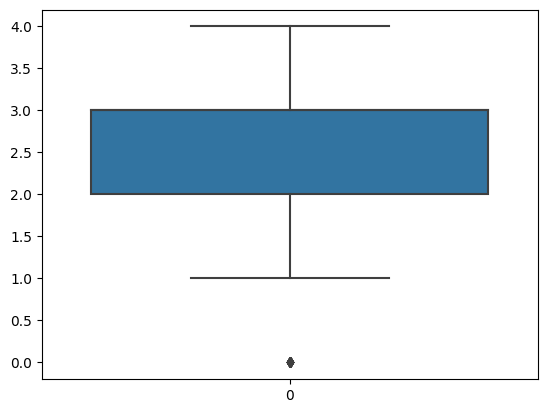

In [ ]:
# Boxplot of the "Region_store" column.
sns.boxplot(data['Region_customer'])
plt.show()

In [ ]:
# Remove the record where 'Region_customer' equals 0
data = data.loc[data['Region_customer'] != 0]

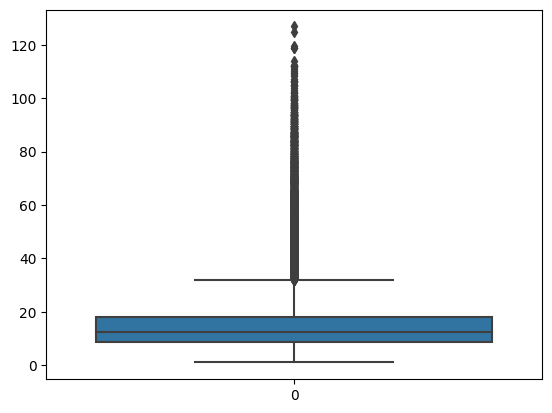

In [ ]:
# Boxplot of the 'Amount' column.
sns.boxplot(data['Amount'])
plt.show()

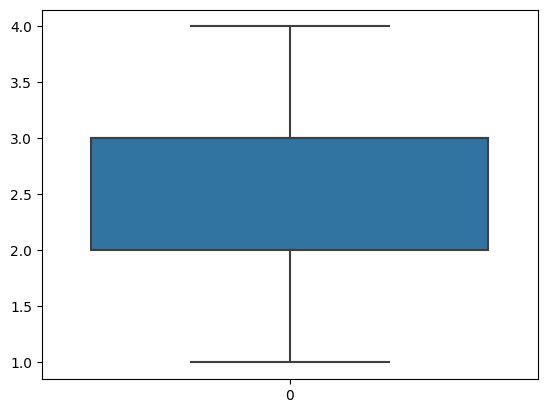

In [ ]:
# Boxplot of the 'Region_store' column. No outliers are found.
sns.boxplot(data['Region_store'])
plt.show()

### 3.3.4 Explore the correlation of different variables

I employed a heatmap for visualizing the associations among various variables. Interestingly, the correlation between 'Region_customer' and 'Region_store' was not as strong as anticipated (0.58). My assumption is that since the dataset was gathered from customers residing on an island, the spatial restrictions are relatively less, enabling customers to shop conveniently from locations that differ from their residence.

<ipython-input-33-429174519ac5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)


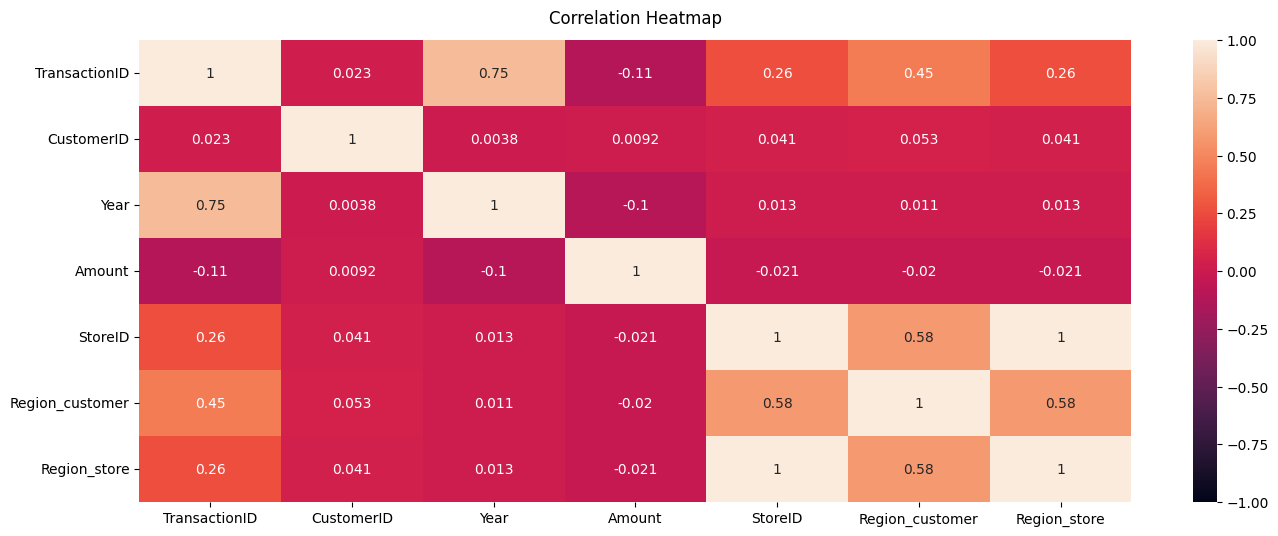

In [ ]:
# The size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
# Save the clean dataset as a separate file
data.to_csv('Outdoor_Case_Study_Data.csv', index=False)

# 4 Data analysis

Please refer to the Tableau workbook for more information.

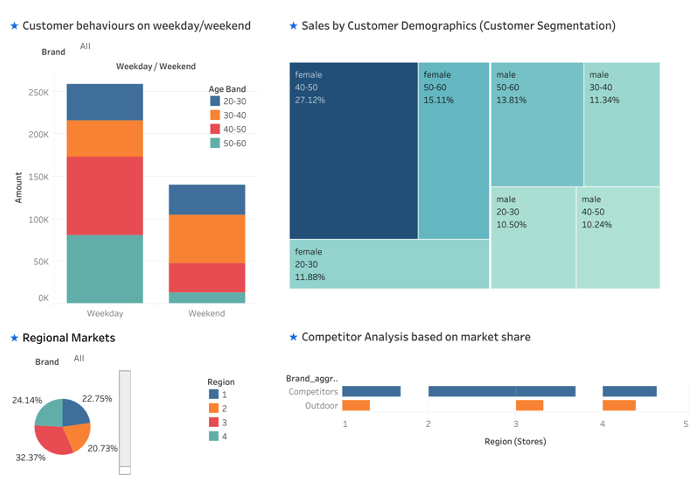

# 5 Discussion

Key insights:

*   **Younger Customers Engagement**: Customers under the age of 40 exhibit lower purchasing activity during weekdays. To address this, Outdoor can enhance sales by implementing a targeted digital marketing strategy and offering exclusive discounts or rewards during off-peak times to this demographic.

*   **Female Age Group 40-50**: Females aged between 40-50 are a significant contributor to Outdoor's sales, indicating a strong affinity for Outdoor's products within this demographic. To capitalize on this, Outdoor can personalize marketing campaigns, curate product offerings, build a community, and implement loyalty programs specifically targeting this group.

*   **Regional Market Expansion**: While Outdoor holds a market share of between 31% and 38% in Regions 1, 3, and 4 where it operates stores, it lacks a physical presence in Region 2 where its competitors account for 20.73% of the market share. To tap into this unexplored market, Outdoor could expand its operations to Region 2, strengthen its online presence, and consider partnerships or pop-up stores.


*   **Cross-Region Purchasing**: Customers on an island have the convenience to purchase from locations different from where they live. Outdoor could introduce loyalty programs that reward customers for shopping at any of their locations across the island. Additionally, they could enhance the shopping experience by providing free or reduced-cost delivery to various parts of the island, including options for same-day delivery.



Further improvement:

In the event that additional data is supplied in the future, such as specific date information, I can conduct further analytics like Time-Series Analysis. This exploration of sales across time may uncover detailed seasonal patterns, pinpointing exact periods of highs and lows in sales. Moreover, by investigating the relationship between where customers live and the location of the store they shop, Outdoor could recognize areas with significant growth potential. Even areas with fewer residents might draw shoppers from different parts of the island, and expanding into these locations could potentially enhance sales.
